<a href="https://colab.research.google.com/github/Aya-Elgammal/Multi-Regression-/blob/main/Gradient_Descent_Multi_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_excel('/content/sample_data/50_StartUp.xlsx')

In [3]:
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.shape

(50, 5)

In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df=data.copy()

In [8]:
df.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [9]:
print(df.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [10]:
data_encoded = pd.get_dummies(df, columns=['State'])
cr = data_encoded.corr()
cr

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<Axes: >

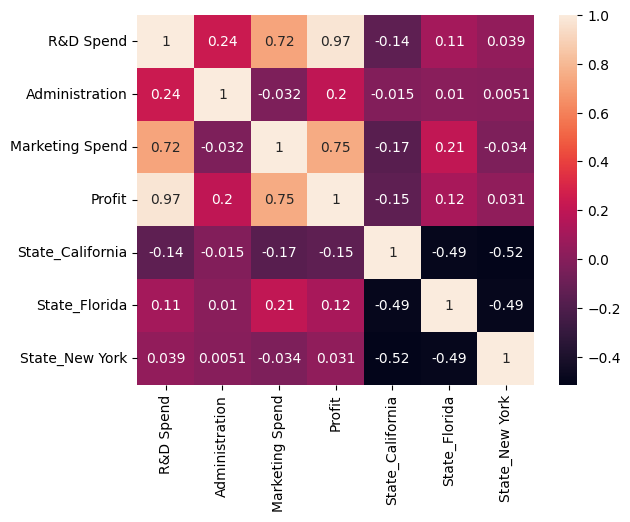

In [11]:
sns.heatmap(cr,annot=True)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

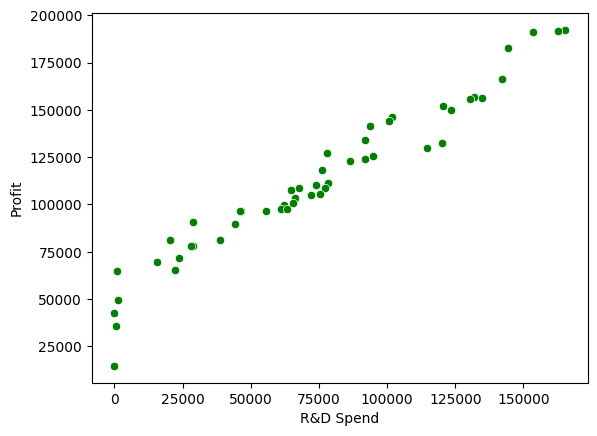

In [12]:
sns.scatterplot(x='R&D Spend',y='Profit',data=df,color='green')

array([[<Axes: title={'center': 'R&D Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

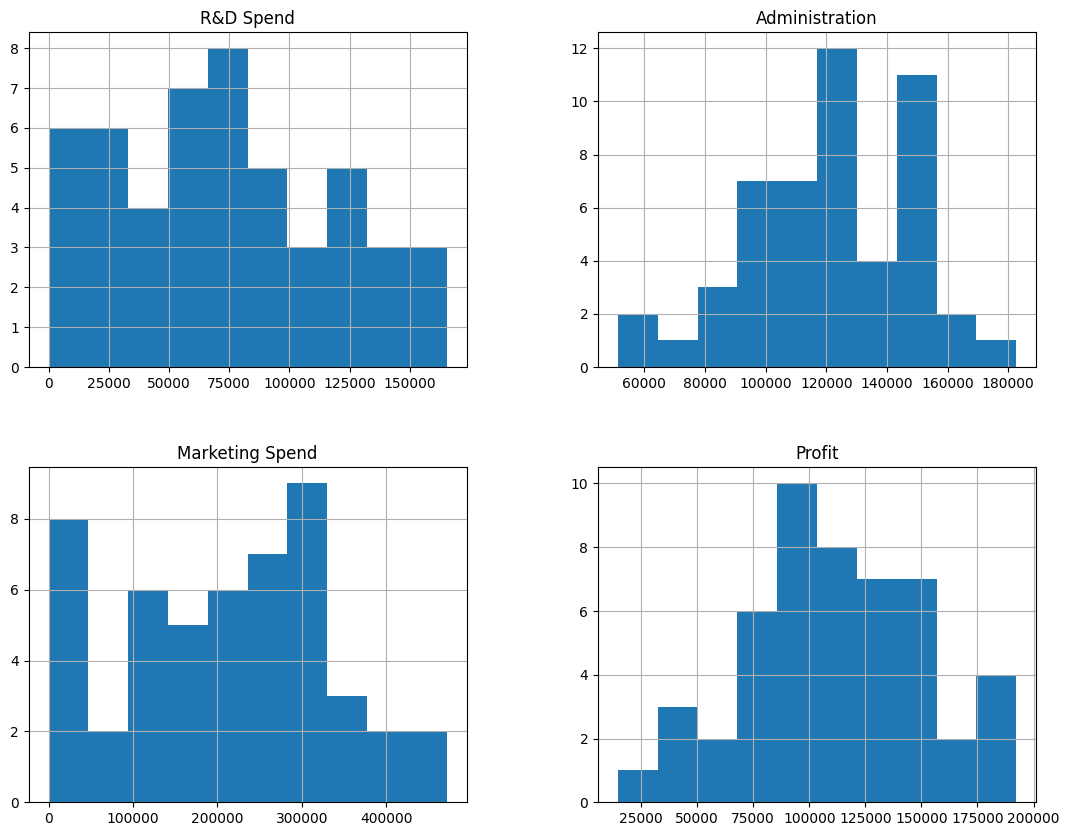

In [13]:
df.hist(figsize=(13,10))

In [14]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [15]:
df_State=pd.get_dummies(df['State'])
df_State

,California,Florida,New York
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,True,False
5,False,False,True
6,True,False,False
7,False,True,False
8,False,False,True
9,True,False,False


In [16]:
df_dum=pd.get_dummies(df['State'],prefix='State')
df_dum

,State_California,State_Florida,State_New York
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,True,False
5,False,False,True
6,True,False,False
7,False,True,False
8,False,False,True
9,True,False,False


In [17]:
df=pd.concat([df,df_dum],axis=1)
df

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,False,False,True
1,162597.70,151377.59,443898.53,California,191792.06,True,False,False
2,153441.51,101145.55,407934.54,Florida,191050.39,False,True,False
3,144372.41,118671.85,383199.62,New York,182901.99,False,False,True
4,142107.34,91391.77,366168.42,Florida,166187.94,False,True,False
5,131876.90,99814.71,362861.36,New York,156991.12,False,False,True
6,134615.46,147198.87,127716.82,California,156122.51,True,False,False
7,130298.13,145530.06,323876.68,Florida,155752.60,False,True,False
8,120542.52,148718.95,311613.29,New York,152211.77,False,False,True
9,123334.88,108679.17,304981.62,California,149759.96,True,False,False


In [18]:
df = df.drop(["State_Florida"], axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,False,True
1,162597.70,151377.59,443898.53,California,191792.06,True,False
2,153441.51,101145.55,407934.54,Florida,191050.39,False,False
3,144372.41,118671.85,383199.62,New York,182901.99,False,True
4,142107.34,91391.77,366168.42,Florida,166187.94,False,False


In [19]:
df = df.drop(["State"], axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False
2,153441.51,101145.55,407934.54,191050.39,False,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,False,False


In [20]:
x = df.drop("Profit", axis= 1)
y = df["Profit"]
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [21]:
x

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,True,False
2,153441.51,101145.55,407934.54,False,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,False,False
5,131876.90,99814.71,362861.36,False,True
6,134615.46,147198.87,127716.82,True,False
7,130298.13,145530.06,323876.68,False,False
8,120542.52,148718.95,311613.29,False,True
9,123334.88,108679.17,304981.62,True,False


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
x_train

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
6,134615.46,147198.87,127716.82,True,False
41,27892.92,84710.77,164470.71,False,False
46,1315.46,115816.21,297114.46,False,False
47,0.00,135426.92,0.00,True,False
15,114523.61,122616.84,261776.23,False,True
9,123334.88,108679.17,304981.62,True,False
16,78013.11,121597.55,264346.06,True,False
24,77044.01,99281.34,140574.81,False,True
34,46426.07,157693.92,210797.67,True,False
31,61136.38,152701.92,88218.23,False,True


In [24]:
y_train

,Profit
6,156122.51
41,77798.83
46,49490.75
47,42559.73
15,129917.04
9,149759.96
16,126992.93
24,108552.04
34,96712.80
31,97483.56


In [25]:
x_test

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
13,91992.39,135495.07,252664.93,True,False
39,38558.51,82982.09,174999.30,True,False
30,61994.48,115641.28,91131.24,False,False
45,1000.23,124153.04,1903.93,False,True
17,94657.16,145077.58,282574.31,False,True
48,542.05,51743.15,0.00,False,True
26,75328.87,144135.98,134050.07,False,False
25,64664.71,139553.16,137962.62,True,False
32,63408.86,129219.61,46085.25,True,False
19,86419.70,153514.11,0.00,False,True


In [26]:
y_test

,Profit
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37
48,35673.41
26,105733.54
25,107404.34
32,97427.84
19,122776.86


In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [28]:
model=lr.fit(x_train,y_train)

In [29]:
y_pred = model.predict(x_test)
y_pred

array([126187.39411508,  85788.82259504,  99777.0281517 ,  45706.12238327,
       127062.20722778,  51891.83884436, 109114.62977495, 100600.61123705,
        97953.99874711, 111730.57706805, 128818.49200667, 174195.3577262 ,
        93736.28538421, 148381.04097165, 172313.87139386])

In [30]:
df = pd.DataFrame({"y_test" : y_test, "y_pred"
                   : y_pred, "diff between y_pred and y_test" :abs(y_pred-y_test)})
df

,y_test,y_pred,diff between y_pred and y_test
13,134307.35,126187.394115,8119.955885
39,81005.76,85788.822595,4783.062595
30,99937.59,99777.028152,160.561848
45,64926.08,45706.122383,19219.957617
17,125370.37,127062.207228,1691.837228
48,35673.41,51891.838844,16218.428844
26,105733.54,109114.629775,3381.089775
25,107404.34,100600.611237,6803.728763
32,97427.84,97953.998747,526.158747
19,122776.86,111730.577068,11046.282932


In [31]:
from sklearn.metrics import mean_absolute_error
MAE =mean_absolute_error(y_test, y_pred)
MAE

7395.433531487927

In [32]:
RMSE = np.sqrt(MAE)
RMSE

85.99670651535399

In [33]:
model.score(x_train, y_train)

0.9511471170962384

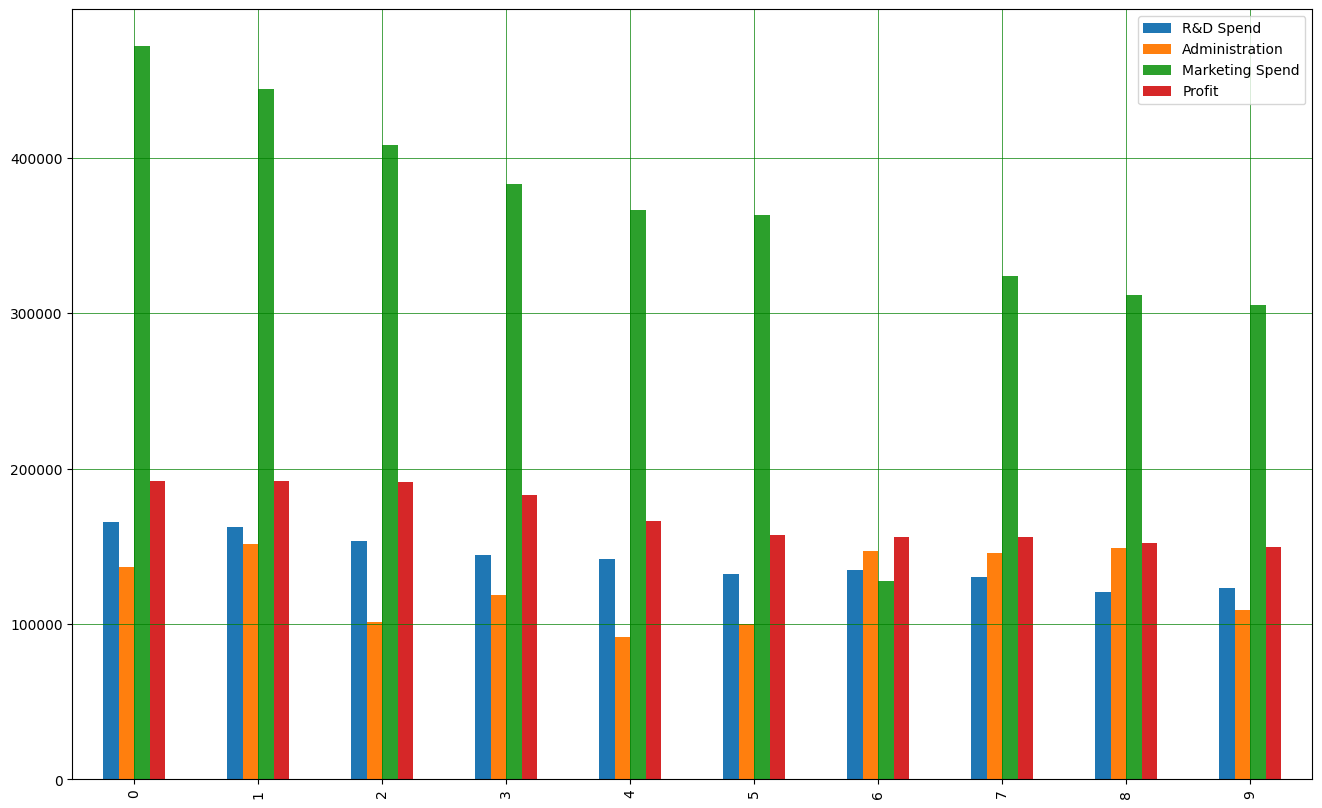

In [34]:
df1 = data.head(10)
df1.plot(kind="bar", figsize=(16,10))
plt.grid(which="major",linestyle="-", linewidth="0.5",color="green")

plt.show()

In [35]:
print('Intercept of the model:\n',lr.intercept_)
print("="*100)
print('Coefficient of the line:\n',lr.coef_)

Intercept of the model:
 57870.71148927942
Coefficient of the line:
 [ 8.04937292e-01 -9.12577104e-02  2.80672826e-02 -4.58070775e+02
 -1.69322751e+03]
